<div style="background-color: #008080; padding: 20px;">
    <h1 style="color: white; font-family: Arial;">Customer Churn Prediction</h1>
</div>

### Table of Contents
- [Data Information and Cleaning](#section-1)
- [Exploratory Data Analysis](#section-2)
- [Data Pre-processing for Machine Learning Model](#section-3)
- [Logistic Regression](#section-4)
- [Artificial Neural Network](#section-5)


Introduction:

In today's highly competitive telecommunications industry, retaining customers is paramount to the success and profitability of service providers. The phenomenon of customers discontinuing their services with a telecom company, commonly known as "customer churn," has become a critical concern. Customer churn not only impacts revenue but also undermines a company's reputation and market position. Therefore, understanding and predicting customer churn has become a strategic imperative for telecom companies.

Link to the dataset - https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
#Importing libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Reading the dataset
df = pd.read_csv("Telco Customer Churn Dataset.csv")

<div style="background-color: #000080; padding: 10px;">
    <h2 style="color: white;">Data Information and Cleaning</h2>
</div>
<a id="section-1"></a>




In [3]:
#Looking at the first 5 rows of the dataset to get an idea what it contains
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The CustomerID would not add any value to our Analysis or to the Machine Learning model. So we drop that column.

In [4]:
#Dropping the column
df = df.drop('customerID' , axis='columns')

In [5]:
#Number of rows and columns present in the dataset
number_of_rows = df.shape[0]
number_of_columns = df.shape[1]

print("The number of rows in the dataset are:",number_of_rows)
print("The number of columns in the dataset are:",number_of_columns)

The number of rows in the dataset are: 7043
The number of columns in the dataset are: 20


In [6]:
#Check what features are present in the dataset. For this we extract the column names
column_names = df.columns.tolist()
print(column_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [7]:
#Information of the data available to us
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


We notice that even though the 'TotalCharges' column should have the datatype of float, it has the 'object' datatype.
So we will need to convert the 'object' datatype into the float datatype

In [8]:
#Converting 'TotalCharges' column to the Numeric Datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("The number of rows with NaN values in the column TotalCharges are - ",df['TotalCharges'].isna().sum())

The number of rows with NaN values in the column TotalCharges are -  11


In [9]:
#Dropping the rows with NaN values
df.dropna(subset=['TotalCharges'], inplace=True)

In [10]:
#Checking the shape of the new dataset
#Number of rows and columns present in the dataset
number_of_rows = df.shape[0]
number_of_columns = df.shape[1]

print("The number of rows in the dataset are:",number_of_rows)
print("The number of columns in the dataset are:",number_of_columns)

The number of rows in the dataset are: 7032
The number of columns in the dataset are: 20


We have removed a total of 11 rows from the dataset.
The original dataset had 7043 rows, and the new dataset has 7032 rows.

In [11]:
#Description of the columns in the data that contain numeric values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [12]:
#Checking for Null Values in the Dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

From the output of the above cell, we see that there are no further null values detected in the dataset.

We will now see the values of different features corresponding to a single row in the dataset. In this case, we will choose row number 200 and see the values that different features have in this row

In [13]:
df.iloc[200]

gender                               Female
SeniorCitizen                             0
Partner                                 Yes
Dependents                               No
tenure                                   27
PhoneService                            Yes
MultipleLines                            No
InternetService                 Fiber optic
OnlineSecurity                          Yes
OnlineBackup                             No
DeviceProtection                         No
TechSupport                             Yes
StreamingTV                             Yes
StreamingMovies                         Yes
Contract                           One year
PaperlessBilling                        Yes
PaymentMethod       Credit card (automatic)
MonthlyCharges                        101.9
TotalCharges                        2681.15
Churn                                    No
Name: 200, dtype: object

<div style="background-color: #000080; padding: 10px;">
    <h2 style="color: white;">Exploratory Data Analysis</h2>
</div>
<a id="section-2"></a>

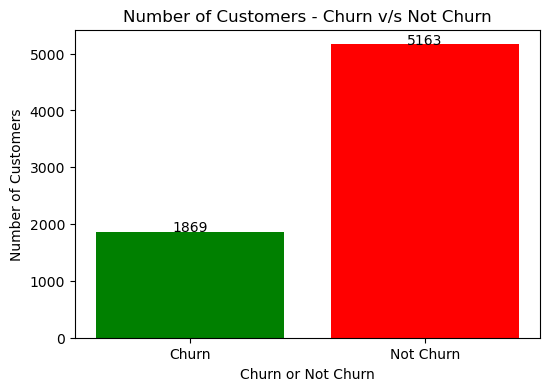

In [14]:
churn_counts = df['Churn'].value_counts()[1]
not_churn_counts = df['Churn'].value_counts()[0]

plt.figure(figsize=(6, 4))

#Plotting the result in a bar graph
categories = ['Churn' , 'Not Churn']
values = [churn_counts , not_churn_counts]
plt.bar(categories, values, color=['green','red'])

# Annotate bars with numeric values
for i, value in enumerate(values):
    plt.text(categories[i], values[i] + 1, str(value), ha='center')

# Add labels and title
plt.xlabel('Churn or Not Churn')
plt.ylabel('Number of Customers')
plt.title('Number of Customers - Churn v/s Not Churn')

# Display the graph
plt.show()

In the above cell output we can see that the number of customers that stay with the company and use their services (5174) is much larger than the number of customers who leave the company's services (1869). This would create a data imbalance which can lead to the predictions of a machine learning model to be biased towards one class.

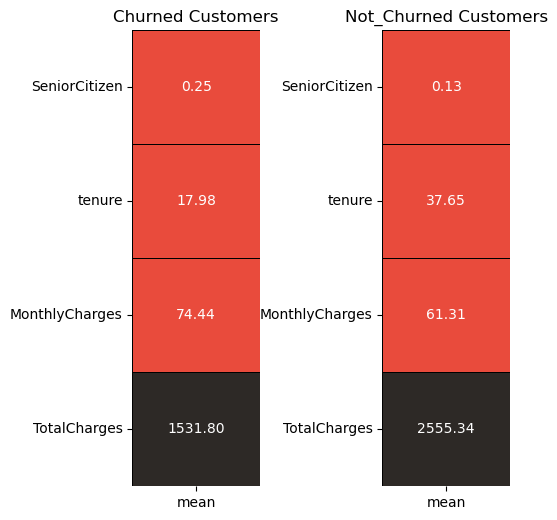

In [15]:
colors = ['#E94B3C','#2D2926']

churn = df[df['Churn'] == 'Yes'].describe().T
not_churn = df[df['Churn'] == 'No'].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

In the above visualisation, we observe that the TotalCharges for the customers who stay are much higher, also the tenure of the customers who leave the company's services are must lesser than the customers who stay with the company.

Monthly charges for the customers who stay with the company are lesser than those that leave the company's services.

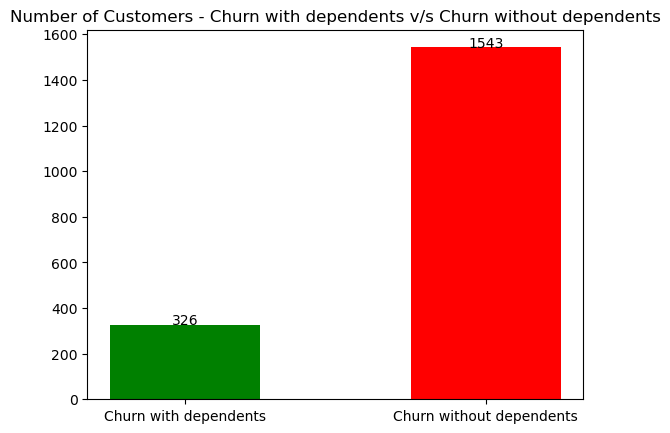

In [16]:
# Count the occurrences of 'Yes' in 'Dependents' when 'Churn' is 'Yes'
count_yes_dependents = df[df['Churn'] == 'Yes']['Dependents'].value_counts().get('Yes', 0)
count_no_dependents = df[df['Churn'] == 'Yes']['Dependents'].value_counts().get('No', 0)

#Plotting the values
categories = ['Churn with dependents' , 'Churn without dependents']
values = [count_yes_dependents , count_no_dependents]
plt.bar(categories, values , width = 0.5, color=['green','red'])

# Annotate bars with numeric values
for i, value in enumerate(values):
    plt.text(categories[i], values[i] + 1, str(value), ha='center')

# Add title
plt.title('Number of Customers - Churn with dependents v/s Churn without dependents')

# Display the graph
plt.show()

As we can see from the visulisation above, Out of the total customers that leave the company's services, chances of a customer churning are much higher for customers who are without any dependents.

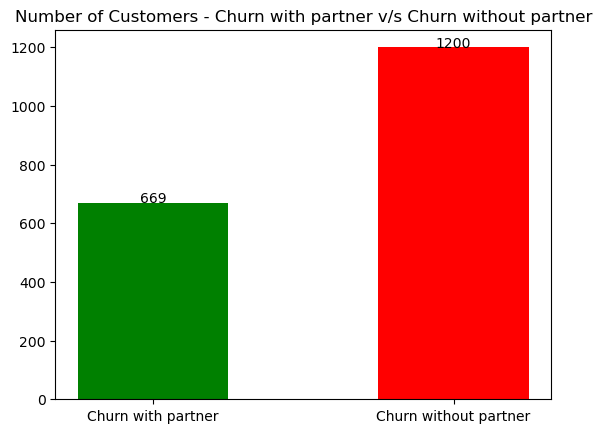

In [17]:
# Count the occurrences of 'Yes' in 'Partner' when 'Churn' is 'Yes'
count_yes_partner = df[df['Churn'] == 'Yes']['Partner'].value_counts().get('Yes', 0)
count_no_partner = df[df['Churn'] == 'Yes']['Partner'].value_counts().get('No', 0)

#Plotting the values
categories = ['Churn with partner' , 'Churn without partner']
values = [count_yes_partner , count_no_partner]
plt.bar(categories, values , width = 0.5, color=['green','red'])

# Annotate bars with numeric values
for i, value in enumerate(values):
    plt.text(categories[i], values[i] + 1, str(value), ha='center')

# Add title
plt.title('Number of Customers - Churn with partner v/s Churn without partner')

# Display the graph
plt.show()

From the output of the above cell, we notice that the customers who have a partner are much more likely to continue with the compnay's services than the customers that do not.

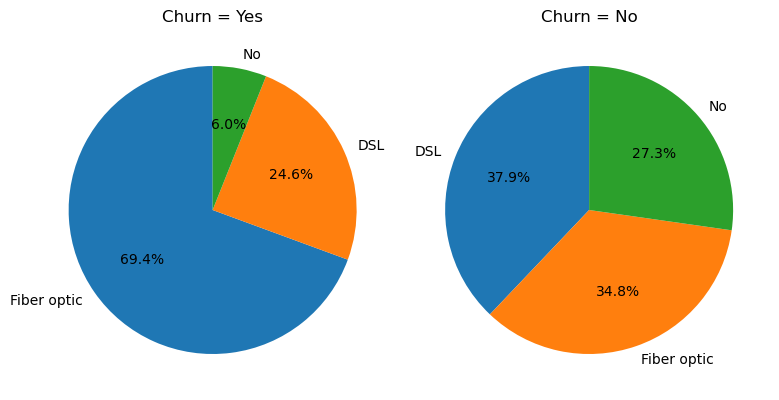

In [18]:
# Filter the DataFrame for Churn = 'Yes' and 'No'
churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']

# Count the occurrences of each InternetService category for Churn = 'Yes' and 'No'
counts_yes = churn_yes['InternetService'].value_counts()
counts_no = churn_no['InternetService'].value_counts()

# Create two subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart for Churn = 'Yes'
ax1.pie(counts_yes, labels=counts_yes.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Churn = Yes')

# Pie chart for Churn = 'No'
ax2.pie(counts_no, labels=counts_no.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Churn = No')

# Display the pie charts
plt.tight_layout()
plt.show()

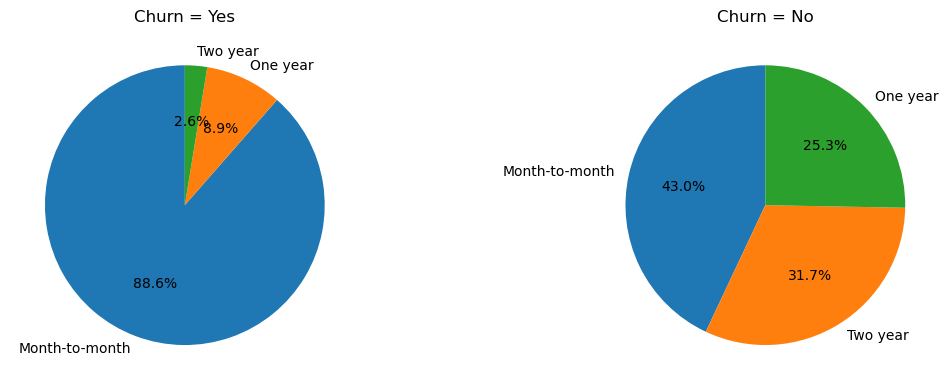

In [19]:
# Filter the DataFrame for Churn = 'Yes' and 'No'
churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']

# Count the occurrences of each Contract category for Churn = 'Yes' and 'No'
counts_yes = churn_yes['Contract'].value_counts()
counts_no = churn_no['Contract'].value_counts()

# Create two subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart for Churn = 'Yes'
ax1.pie(counts_yes, labels=counts_yes.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Churn = Yes')

# Pie chart for Churn = 'No'
ax2.pie(counts_no, labels=counts_no.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Churn = No')

plt.tight_layout()
plt.show()

We notice that a lot of customer who have churn = Yes (leave the services of the company) have a month- month contract with the company.

<div style="background-color: #000080; padding: 10px;">
    <h2 style="color: white;">Data Pre-processing for Machine Learning Model</h2>
</div>
<a id="section-3"></a>

In [20]:
#We look at the unique values that are present in each column of the dataset.
for column in df:
  print(column , ":\t" , df[column].unique())

gender :	 ['Female' 'Male']
SeniorCitizen :	 [0 1]
Partner :	 ['Yes' 'No']
Dependents :	 ['No' 'Yes']
tenure :	 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :	 ['No' 'Yes']
MultipleLines :	 ['No phone service' 'No' 'Yes']
InternetService :	 ['DSL' 'Fiber optic' 'No']
OnlineSecurity :	 ['No' 'Yes' 'No internet service']
OnlineBackup :	 ['Yes' 'No' 'No internet service']
DeviceProtection :	 ['No' 'Yes' 'No internet service']
TechSupport :	 ['No' 'Yes' 'No internet service']
StreamingTV :	 ['No' 'Yes' 'No internet service']
StreamingMovies :	 ['No' 'Yes' 'No internet service']
Contract :	 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :	 ['Yes' 'No']
PaymentMethod :	 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :	 [29.85 56.95 53.85 

A machine learning / deep learning models would not accept values with the object data type. We would need to convert this to a numeric data type.

So first let us look at the columns which contain the object data type

In [21]:
#We now see only the columns which have an object datatype stored in them

def print_unique_col_values(df):
  for column in df:
    if df[column].dtype == 'object':
      print(f"{column} :\t {df[column].unique()}")

print_unique_col_values(df)

gender :	 ['Female' 'Male']
Partner :	 ['Yes' 'No']
Dependents :	 ['No' 'Yes']
PhoneService :	 ['No' 'Yes']
MultipleLines :	 ['No phone service' 'No' 'Yes']
InternetService :	 ['DSL' 'Fiber optic' 'No']
OnlineSecurity :	 ['No' 'Yes' 'No internet service']
OnlineBackup :	 ['Yes' 'No' 'No internet service']
DeviceProtection :	 ['No' 'Yes' 'No internet service']
TechSupport :	 ['No' 'Yes' 'No internet service']
StreamingTV :	 ['No' 'Yes' 'No internet service']
StreamingMovies :	 ['No' 'Yes' 'No internet service']
Contract :	 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :	 ['Yes' 'No']
PaymentMethod :	 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :	 ['No' 'Yes']


In the above cell output we see that the column OnlineSecurity has a unique value of 'No internet service'. This is also the case for the columns OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies

In a similar case, the column 'MultipleLines' contains the value "No phone service"

In all these case we will replace the 'No internet service' and ' No phone service" with the simple 'No'

In [22]:
df.replace("No internet service" , "No" , inplace=True)
df.replace("No phone service" , "No" , inplace=True)

In [23]:
#We again check the unique values in each column which has the object data type
print_unique_col_values(df)

gender :	 ['Female' 'Male']
Partner :	 ['Yes' 'No']
Dependents :	 ['No' 'Yes']
PhoneService :	 ['No' 'Yes']
MultipleLines :	 ['No' 'Yes']
InternetService :	 ['DSL' 'Fiber optic' 'No']
OnlineSecurity :	 ['No' 'Yes']
OnlineBackup :	 ['Yes' 'No']
DeviceProtection :	 ['No' 'Yes']
TechSupport :	 ['No' 'Yes']
StreamingTV :	 ['No' 'Yes']
StreamingMovies :	 ['No' 'Yes']
Contract :	 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :	 ['Yes' 'No']
PaymentMethod :	 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :	 ['No' 'Yes']


We will now convert the "Yes" and "No" to 0 and 1 values

In [24]:
yes_no_columns = ['Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' ,
                  'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling' , 'Churn']

for col in yes_no_columns:
  df[col].replace({'Yes':1 , 'No':0} , inplace=True)

In [25]:
#We again check the unique values in each column which has the object data type
print_unique_col_values(df)

gender :	 ['Female' 'Male']
InternetService :	 ['DSL' 'Fiber optic' 'No']
Contract :	 ['Month-to-month' 'One year' 'Two year']
PaymentMethod :	 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


We have a column named "gender" which has the values "Female" and "Male". We replace both of them with 0 and 1

In [26]:
df["gender"].replace({'Female':1 , 'Male':0} , inplace=True)

In [27]:
#We again check the unique values in each column which has the object data type
print_unique_col_values(df)

InternetService :	 ['DSL' 'Fiber optic' 'No']
Contract :	 ['Month-to-month' 'One year' 'Two year']
PaymentMethod :	 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In the above cell output we observe that all the three columns listed above have more than 2 fields as their values.

So converting the values to 0 and 1 would not work in this case.

To handle these columns we perform "one hot encoding"

In [28]:
#Doing one hot encoding on the three columns
df = pd.get_dummies(data=df , columns = ['InternetService' , 'Contract' , 'PaymentMethod'])

In [29]:
#Now we look at a random sample of 4 rows in the dataset
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
514,0,0,0,0,30,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
4647,0,0,1,1,4,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2391,0,0,0,0,8,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,71,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In the above cell output we observe that all the column values are now numeric.

We also observe that three separate columns have been created from 'InternetService' and 'Contract' columns and 4 separate rows have been created for the 'PaymentMethod' column

In [30]:
#To check the datatypes of all the columns
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

While most of the features have either a 1 or 0 as their value, some of the feature columns such as montly charges or tenure have a very different range.
We now need to rescale the data that they are approximately in the same range of values.

The three columns - Tenure, MonthlyCharges, TotalCharges are in different ranges. Apart from those column, every other column has values that are either 0 or 1.

In [31]:
#Normalisation

cols_to_scale = ['tenure' , 'MonthlyCharges' , 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [32]:
#With the help of this we can see the changed ranges for the above columns
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3613,0,1,0,0,0.760563,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
1294,0,0,0,0,0.070423,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1893,0,0,0,1,0.211268,1,1,1,1,0,...,1,0,0,1,0,0,0,0,1,0


Now our data is ready to be fed into a Machine Learning / Deep Learning model

Before building our prediction model, we will split the dataset into training and testing sets and also separate the dependent and independent variables.

In [33]:
#Split the dependent and independent features
#Independent Features - X , Dependent Feature - y

X = df.drop('Churn',axis='columns')
y = df['Churn']

In [34]:
#Train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [35]:
X_train.shape

(5625, 26)

In [36]:
X_test.shape

(1407, 26)

In [37]:
X_train.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3420,1,0,0,0,0.352113,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0
1553,1,0,1,1,0.535211,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3080,0,0,0,0,0.014085,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


<div style="background-color: #000080; padding: 10px;">
    <h2 style="color: white;">Logistic Regression</h2>
</div>
<a id="section-4"></a>

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train , y_train)

LogisticRegression()

In [39]:
#Prediction using the logistic regression model
y_pred = model.predict(X_test)

In [40]:
#This cell gives us the coefficient for each feature in the logistic regression equation.
#There are a total of 26 features in the dataset, thus the output of the coeficients are 26 numbers each highlighting the coefficient for a single parameter.

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 0.06873074  0.26361519 -0.05322698 -0.10069928 -3.1656447  -0.47787628
   0.24838067 -0.44610168 -0.1783993  -0.08593722 -0.40264358  0.27600495
   0.24450271  0.36813108  0.06378401  1.25036126 -0.03349555  0.76354321
  -0.73270608  0.62605427  0.06111022 -0.68982292 -0.02893924 -0.15437065
   0.28552719 -0.10487571]]
Intercept: [-0.80382195]


In [41]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.79      0.79      0.79      1407



In the above classification report we see that even though the accuracy of the model is equal to 0.79, the F1-score for prediction of class '1' is just equal to 0.61.
One of the reasons that this happens can be because of the data imbalance, where we had much more data for the class '0' than class '1'.

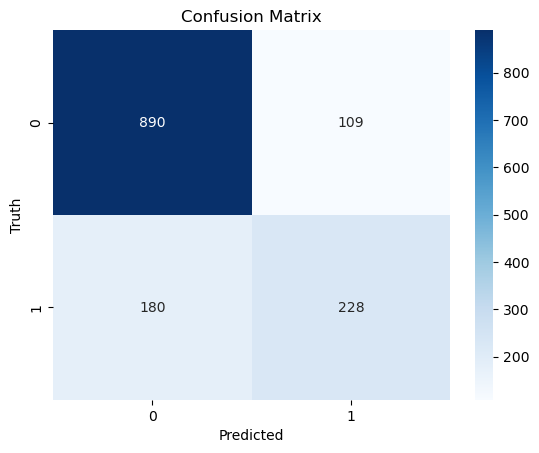

In [42]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

plt.show()

<div style="background-color: #000080; padding: 10px;">
    <h2 style="color: white;">Artificial Neural Network</h2>
</div>
<a id="section-5"></a>

In [43]:
#Importing TensorFlow libraries and creating a neural network model

import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam

model = keras.Sequential([
    keras.layers.Dense(32 , input_shape=(26 , ) , activation='relu'), #Input shape corresponds to the number of columns in X_train
    keras.layers.Dense(16 , activation='relu'),
    keras.layers.Dense(1 , activation='sigmoid')
])

model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics = ['accuracy'])

model.summary()

model.fit(X_train , y_train , epochs = 50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                864       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.4774 - accuracy: 0.7710
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.7995
Epoch 3/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4168 - accur

In [44]:
#Evaluating the model on X_test and y_test
model.evaluate(X_test , y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7783


[0.46760785579681396, 0.778251588344574]

In [45]:
y_predicted = model.predict(X_test)
print("Original predicted array:" , y_predicted[:5])

#The y_predicted array will have the values ranging from 0 to 1. It will at first be a 2D array. We have to first convert it to a 1D array.
#Then we have to convert all the values present in y_predicted to either 0 or 1

44/44 [==============================] - 0s 2ms/step
Original predicted array: [[0.2761708 ]
 [0.6426826 ]
 [0.01490339]
 [0.5111631 ]
 [0.6596569 ]]


In [46]:
y_predicted_0_or_1 = []

for element in y_predicted:
  if element > 0.5:
    y_predicted_0_or_1.append(1)
  else:
    y_predicted_0_or_1.append(0)

print(y_predicted_0_or_1[0:10])

[0, 1, 0, 1, 1, 1, 0, 1, 0, 0]


In [47]:
#Now we compare the y_test array with the y_predicted_0_or_1 list to compare the elements that the prediction got right.

y_test_list = []

for element in y_test[:10]:
  y_test_list.append(element)

print("The y_test (correct answers of the predictions) list looks like - " , y_test_list)
print("The list for predictions made on x_test looks like - " , y_predicted_0_or_1[:10])

The y_test (correct answers of the predictions) list looks like -  [0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
The list for predictions made on x_test looks like -  [0, 1, 0, 1, 1, 1, 0, 1, 0, 0]


In [48]:
#Classification Report
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test , y_predicted_0_or_1))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.55      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Here as well, we find that even though the accuracy is equal to 0.78, the F1-score for prediction of class '1' is just equal to 0.59, while that for class '0' is much higher at 0.85

Text(33.22222222222222, 0.5, 'Truth')

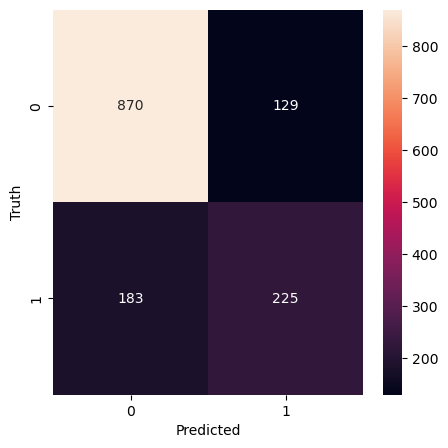

In [49]:
#Creating a confusion matrix

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_0_or_1)

plt.figure(figsize = (5,5))
sn.heatmap(cm , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')